<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Choropleth-Maps" data-toc-modified-id="Choropleth-Maps-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Choropleth Maps</a></span></li></ul></li><li><span><a href="#GeoJSON:-actual-example" data-toc-modified-id="GeoJSON:-actual-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GeoJSON: actual example</a></span></li></ul></div>

### Choropleth Maps

![mapa](../images/geo_portada.jpg)

In [2]:
#!pip install folium
#!pip install geopandas

In [3]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import pandas as pd
import json
import random
import matplotlib.pyplot as plt

In [4]:
# choropletic

In [5]:
#GEOMETRY
    # POINT([lat, lon])

# GeoJSON

In [6]:
# Type point

![Type point](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/1920px-SFA_Point.svg.png)

In [7]:
# GeoJSON type: point
{
    "type": "Point",  # meta info
    "coordinates": [30.0, 10.0] #two coord
}

{'type': 'Point', 'coordinates': [30.0, 10.0]}

In [8]:
# Type multi point

![multi point](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/1920px-SFA_MultiPoint.svg.png)

In [9]:
# Multi point
{
    "type": "MultiPoint", 
    "coordinates": [
        [10.0, 40.0], [40.0, 30.0], [20.0, 20.0], [30.0, 10.0]
    ]
}

{'type': 'MultiPoint',
 'coordinates': [[10.0, 40.0], [40.0, 30.0], [20.0, 20.0], [30.0, 10.0]]}

In [10]:
# Type polygon

![type polygon](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/1920px-SFA_Polygon.svg.png)

In [11]:
# GeoJSON: Type polygon
{
    "type": "Polygon", 
    "coordinates": [
        [[30.0, 10.0], [40.0, 40.0], [20.0, 40.0], [10.0, 20.0], [30.0, 10.0]],
    ]
}

{'type': 'Polygon',
 'coordinates': [[[30.0, 10.0],
   [40.0, 40.0],
   [20.0, 40.0],
   [10.0, 20.0],
   [30.0, 10.0]]]}

In [12]:
# Type multi polygon

![Type multi polygon](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/SFA_MultiPolygon.svg/1920px-SFA_MultiPolygon.svg.png)

In [13]:
{
    "type": "MultiPolygon", 
    "coordinates":[
        [
            [[30.0, 20.0], [45.0, 40.0], [10.0, 40.0], [30.0, 20.0]]
        ], 
        [
            [[15.0, 5.0], [40.0, 10.0], [10.0, 20.0], [5.0, 10.0], [15.0, 5.0]]
        ]
    ]
}

{'type': 'MultiPolygon',
 'coordinates': [[[[30.0, 20.0], [45.0, 40.0], [10.0, 40.0], [30.0, 20.0]]],
  [[[15.0, 5.0], [40.0, 10.0], [10.0, 20.0], [5.0, 10.0], [15.0, 5.0]]]]}

[Getting your own geojson](https://geojson.io/#map=3.86/33.52/-4.14)

## GeoJSON: actual example

In [14]:
import json

We are data analysts but we are going to make up some little facts... sorry 🙄

We make a dataframe with the dictionary that has the list of communities obtained from GeoJSON and the invented data and we rename the columns.

# NYC

In [42]:
path = gpd.datasets.get_path('nybb')
df = gpd.read_file(path)
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


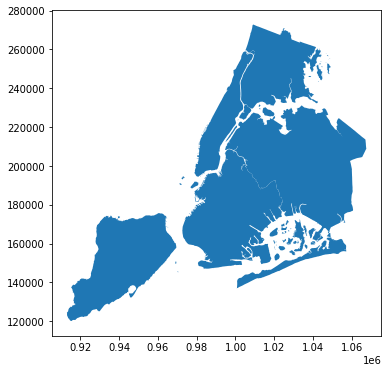

In [43]:
df.plot(figsize=(6, 6))
plt.show()

In [49]:
# Center of each polygon

```python
def ny_map (df):
    m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')

    # 1. Simplifying the neighborhood
    for _, r in df.iterrows():
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j,
                               style_function=lambda x: {'fillColor': 'orange'})
        folium.Popup(r['BoroName']).add_to(geo_j)
        geo_j.add_to(m)


    # 2. Access the centroid attribute of each polygon
    df['centroid'] = df.centroid

    # Project to WGS84 geographic crs
    # geometry (active) column
    df = df.to_crs(epsg=4326)

    # 3. Centroid column
    df['centroid'] = df['centroid'].to_crs(epsg=4326)

    # 4. New column for centroids
    for _, r in df.iterrows():
        lat = r['centroid'].y
        lon = r['centroid'].x
        folium.Marker(location=[lat, lon],
                      popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

    return m
```

In [58]:
def ny_map (df):
    m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')

    # 1. Simplifying the neighborhood
    for _, r in df.iterrows():
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j,
                               style_function=lambda x: {'fillColor': 'orange'})
        folium.Popup(r['BoroName']).add_to(geo_j)
        geo_j.add_to(m)


    # 2. Access the centroid attribute of each polygon
    df['centroid'] = df.centroid

    # Project to WGS84 geographic crs
    # geometry (active) column
    df = df.to_crs(epsg=4326)

    # 3. Centroid column
    df['centroid'] = df['centroid'].to_crs(epsg=4326)

    # 4. New column for centroids
    for _, r in df.iterrows():
        lat = r['centroid'].y
        lon = r['centroid'].x
        folium.Marker(location=[lat, lon],
                      popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

    return m

In [59]:
ny_map (df)

/var/folders/pz/11hk3xjx34z9gw2tjzmjl4lm0000gn/T/ipykernel_36395/1953324876.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['centroid'] = df.centroid


Extra: other type of files. Shapefiles. They contain geo info scattered in different files.

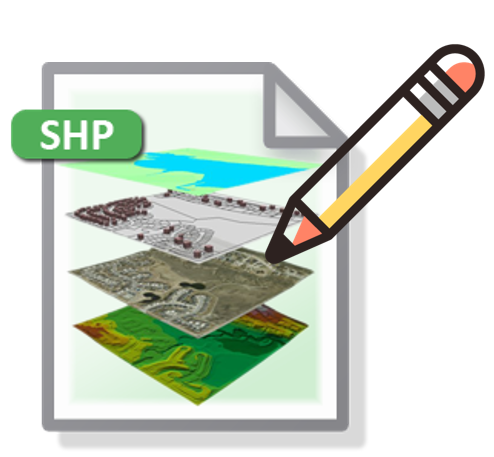